In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1644,2020-09-15,United Kingdom,371234.0,371125.0,41669.0,41637.0,109.0,32.0
1645,2020-09-15,Germany,261296.0,261762.0,9357.0,9362.0,-466.0,-5.0
1646,2020-09-15,Iran,405873.0,404648.0,23391.0,23313.0,1225.0,78.0
1647,2020-09-15,Turkey,292387.0,292878.0,7094.0,7119.0,-491.0,-25.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  9970.557913887204
RMSE =  37509.42470316172


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  309.3232261976956
RMSE =  768.3156165261371


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  71818.4935897436
RMSE =  118192.8663226241
-- World performances for deaths --
MAE =  1788.1858974358975
RMSE =  2184.27751800018


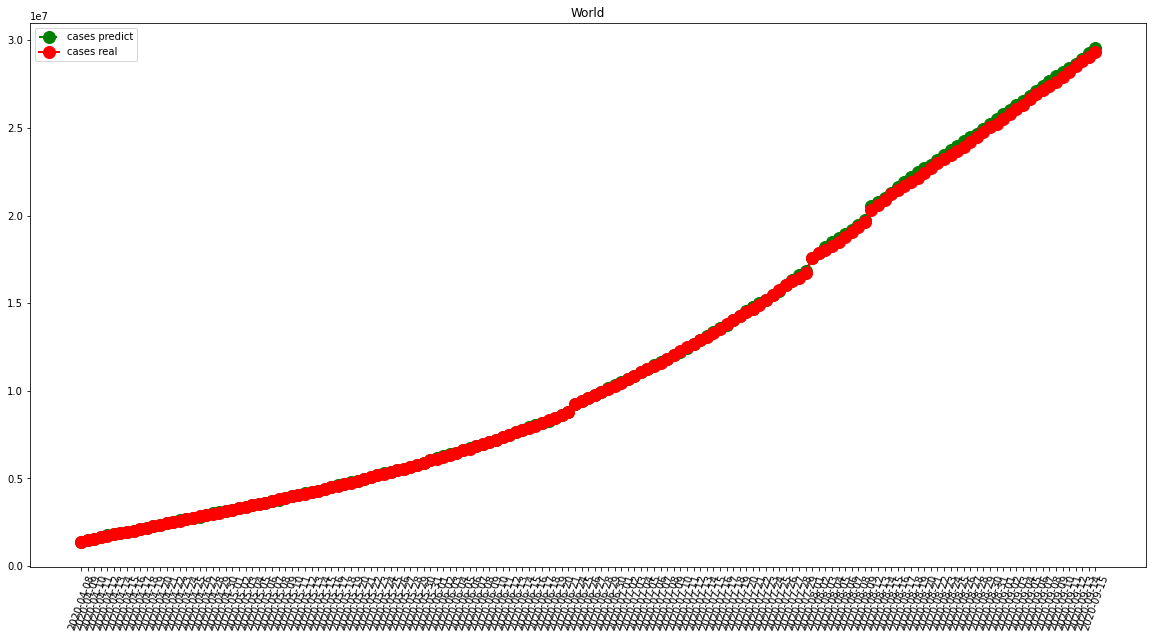

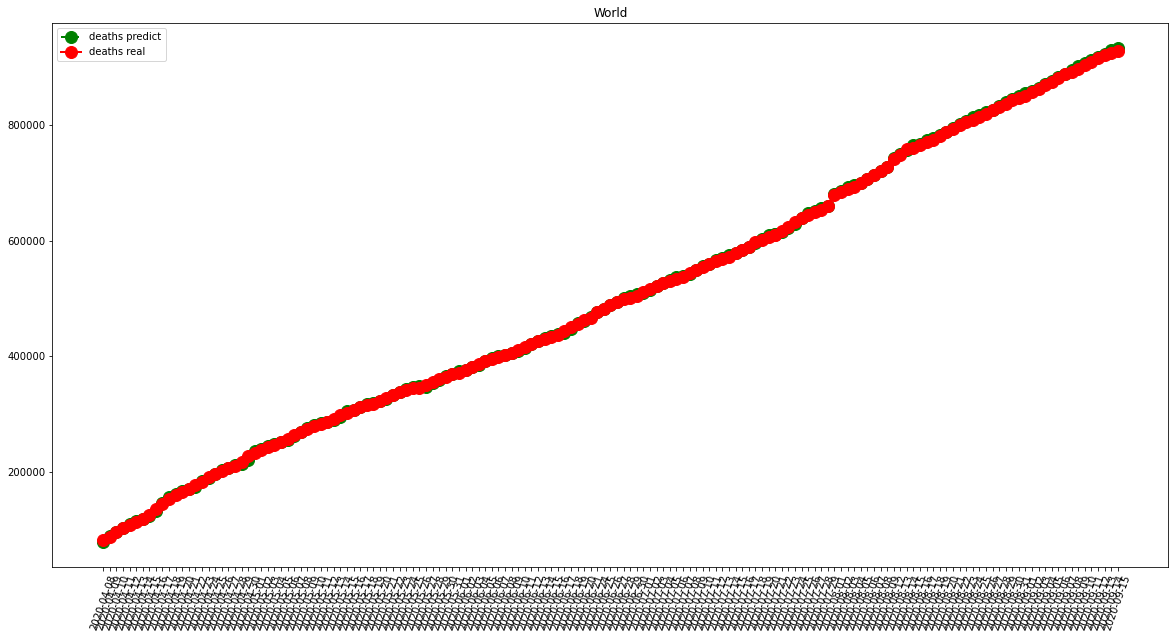

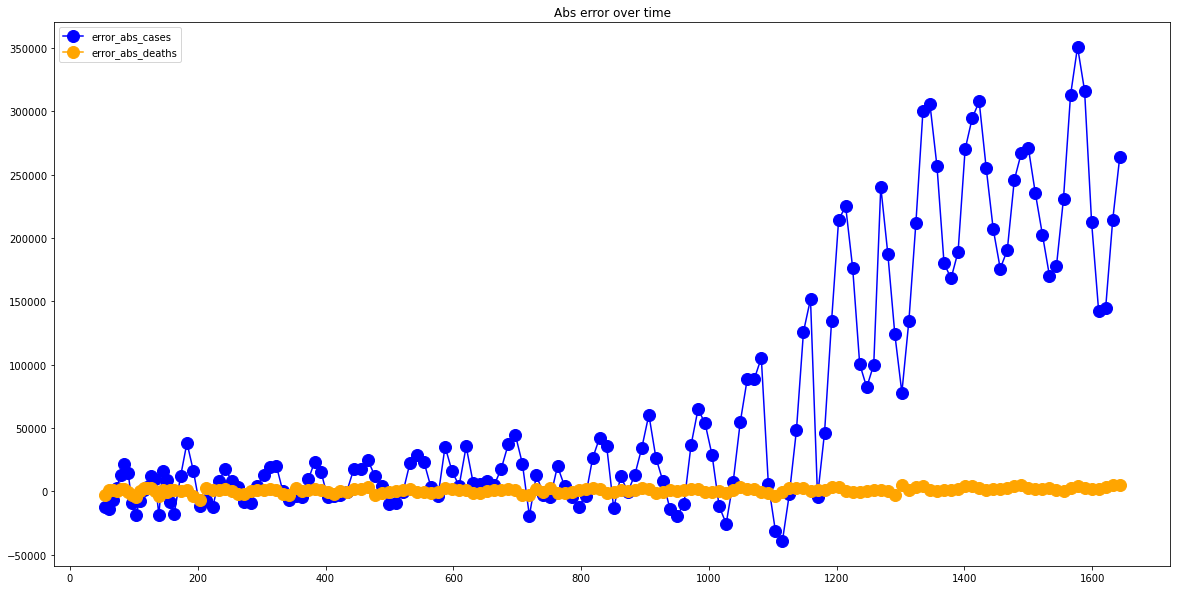

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1094.5722891566265
RMSE =  1617.167203804307
-- France performances for deaths --
MAE =  114.33132530120481
RMSE =  260.4844074143865


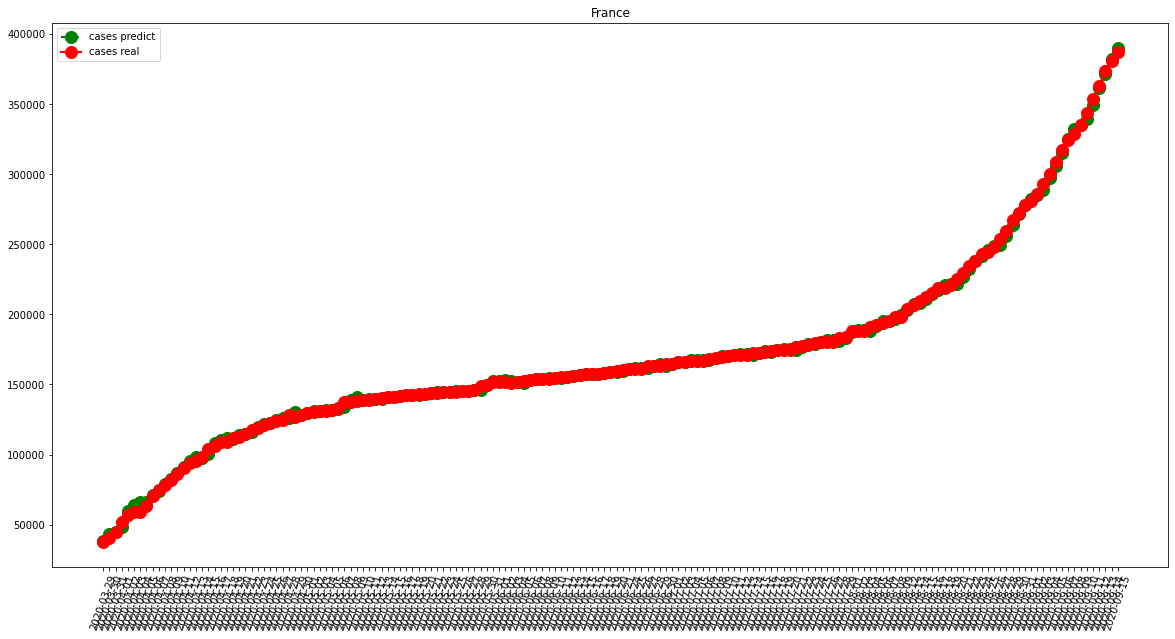

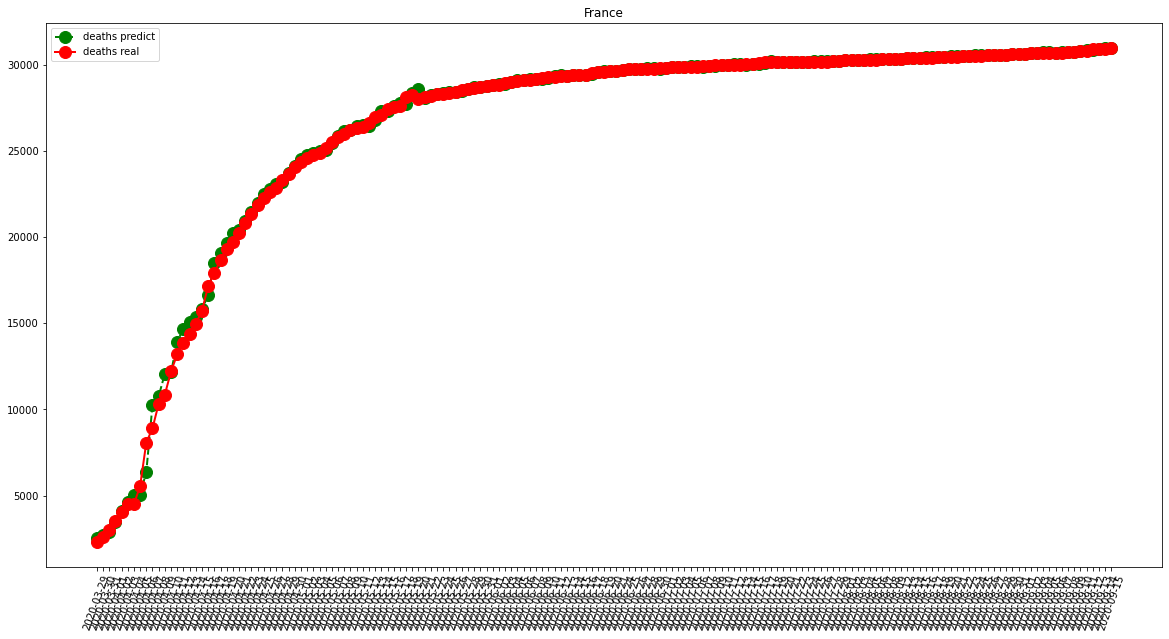

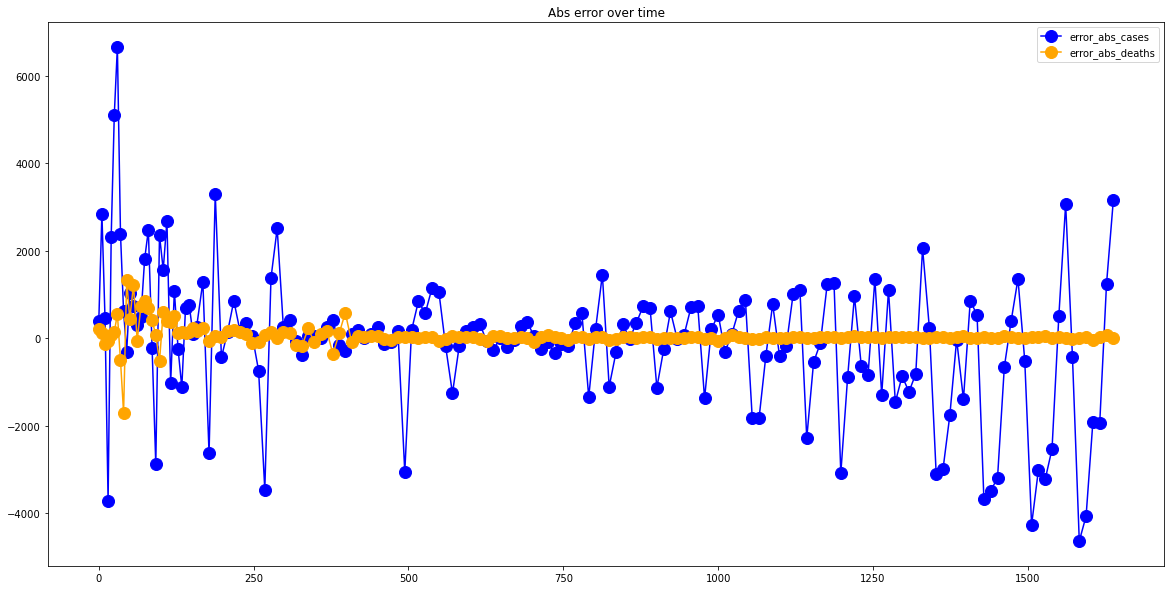

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.73493975903614
RMSE =  448.6814819993763
-- Italy performances for deaths --
MAE =  68.57831325301204
RMSE =  230.457925491155


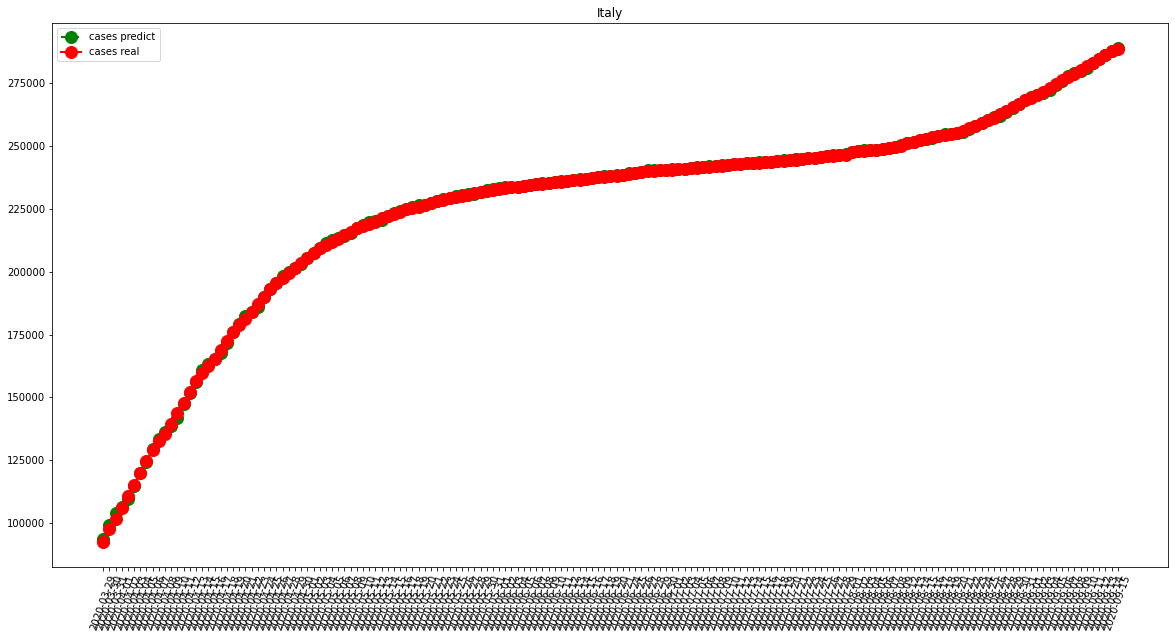

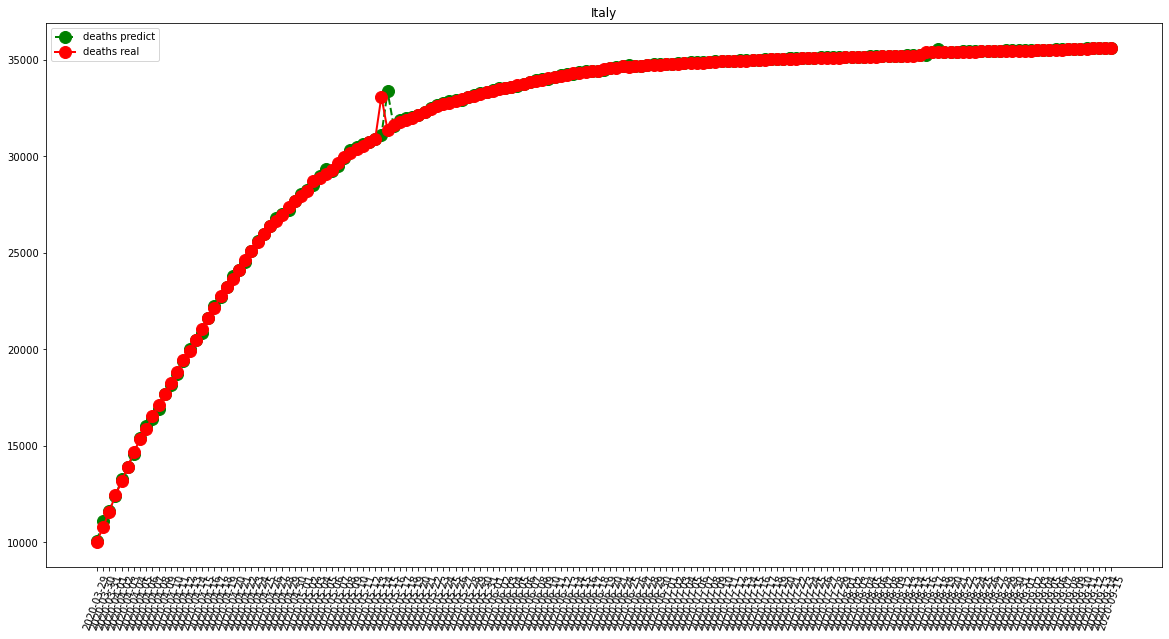

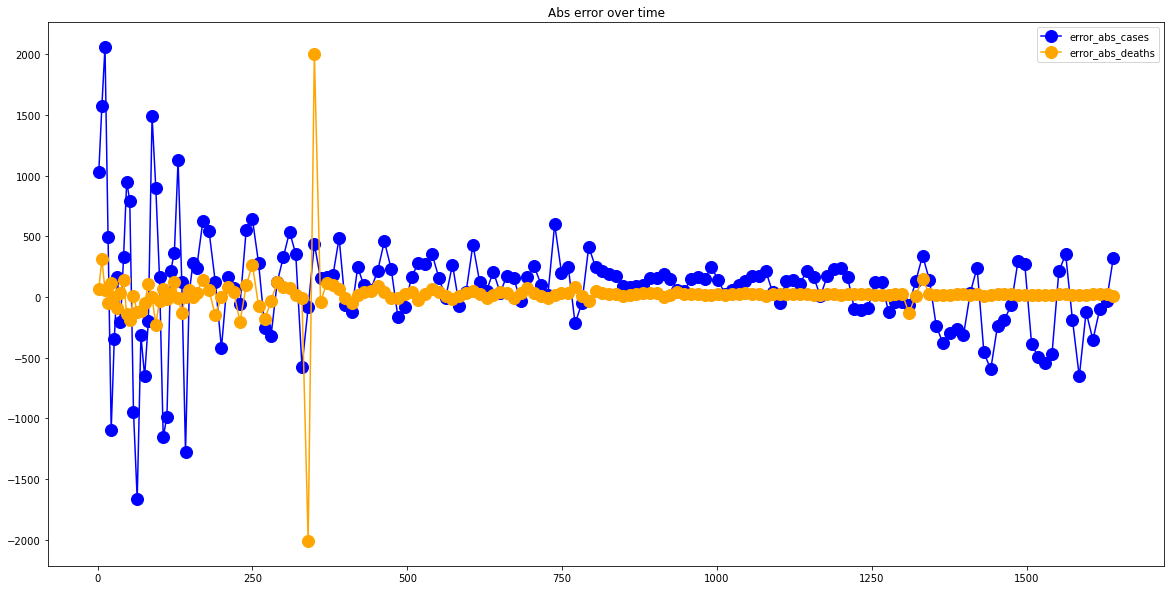

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2459.10843373494
RMSE =  4848.731298475847
-- Spain performances for deaths --
MAE =  120.77710843373494
RMSE =  316.12607100820446


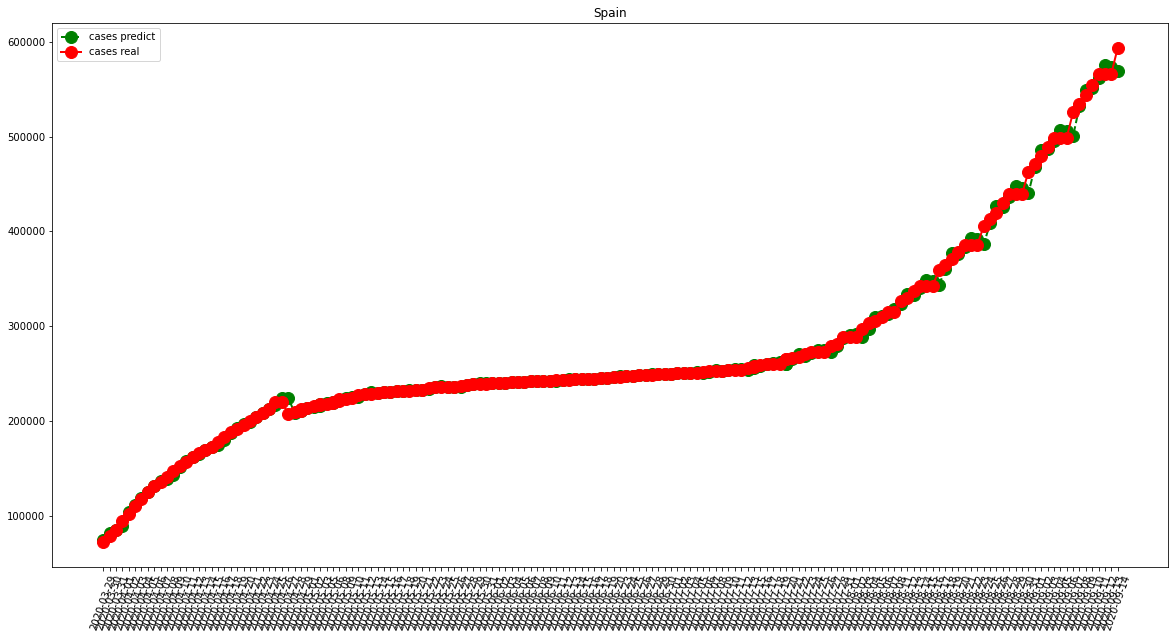

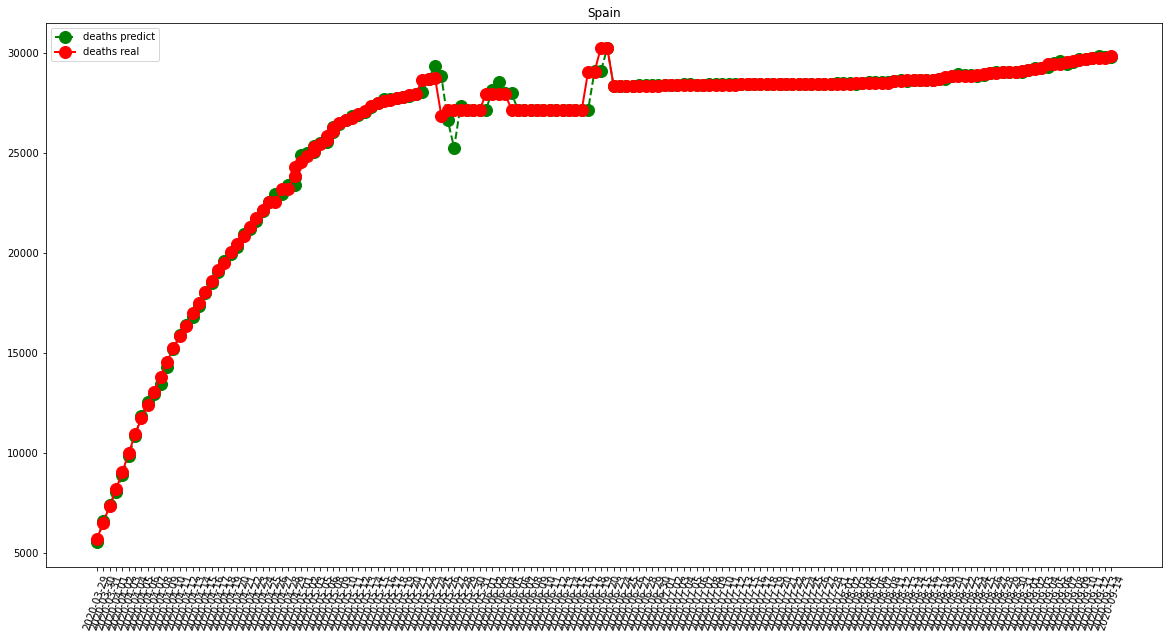

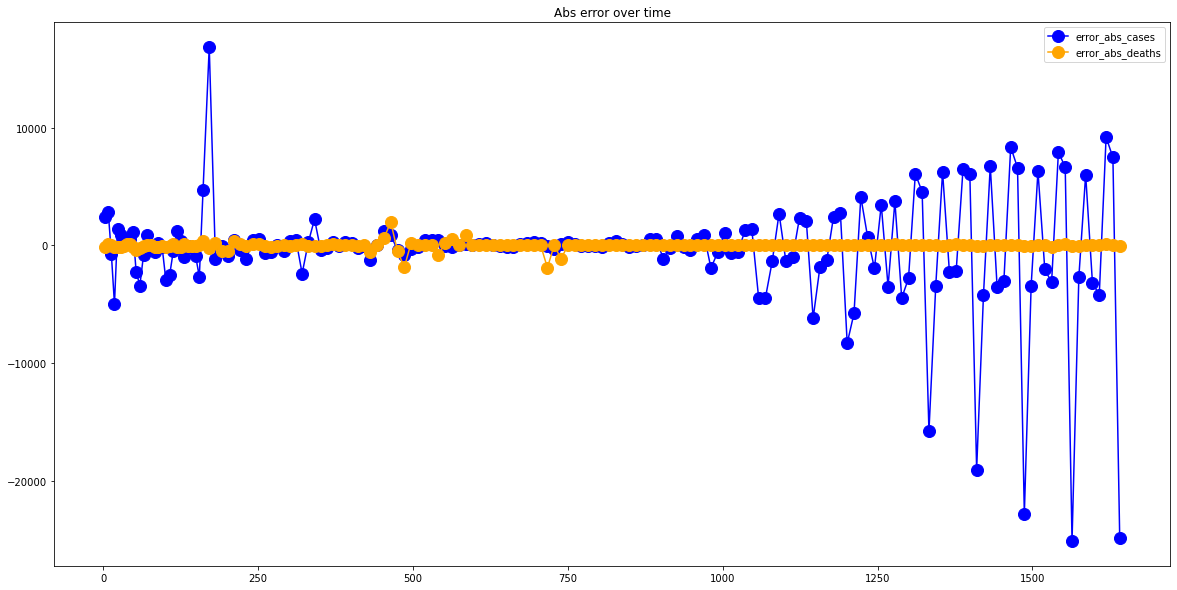

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  14855.903614457831
RMSE =  22506.06449596165
-- United States performances for deaths --
MAE =  484.8975903614458
RMSE =  679.672267763122


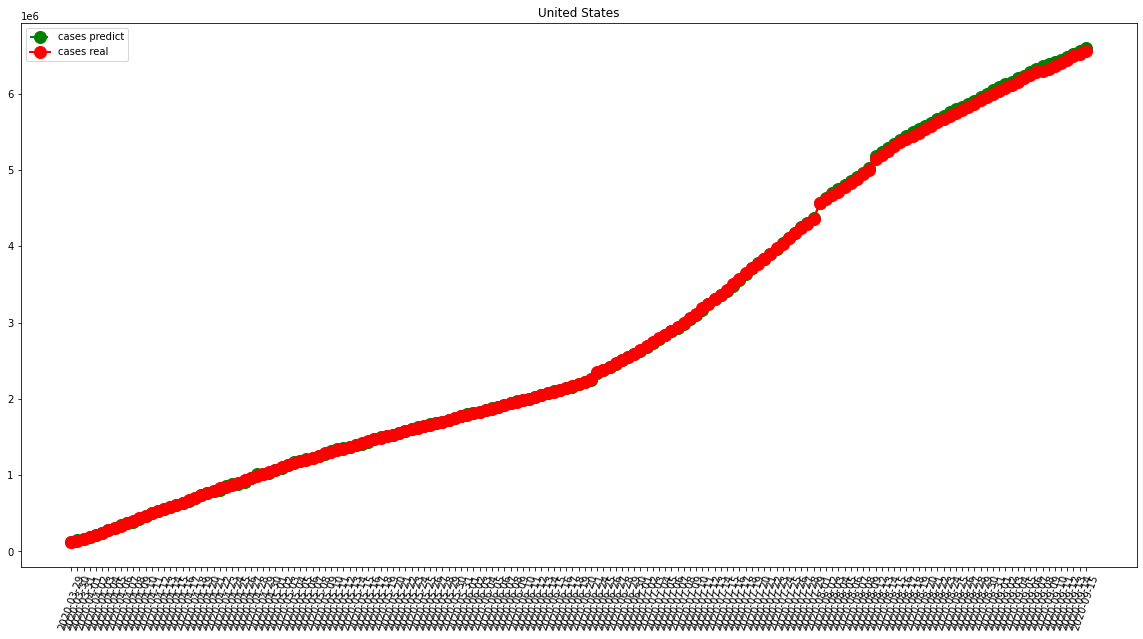

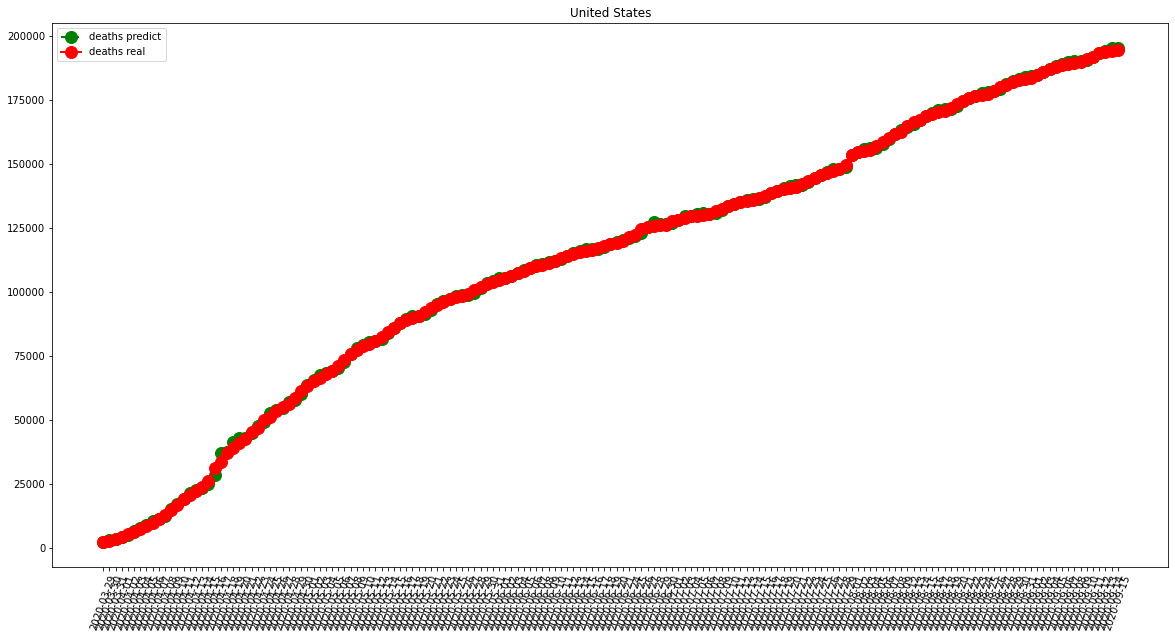

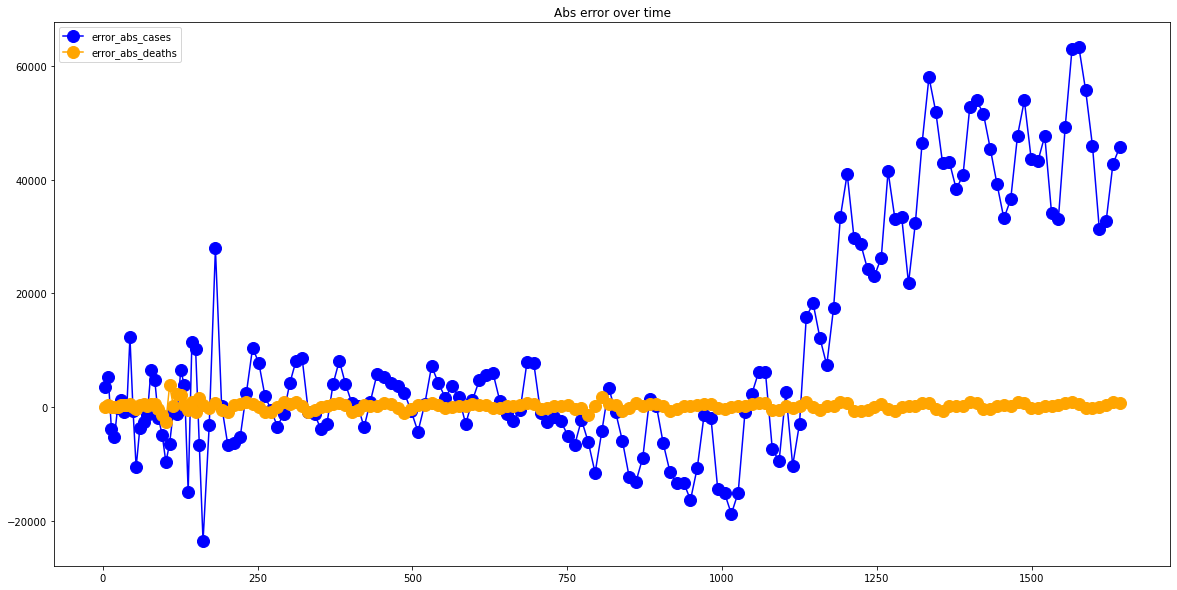

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  60.93975903614458
RMSE =  92.64721271628405
-- China performances for deaths --
MAE =  25.53012048192771
RMSE =  121.88321489150651


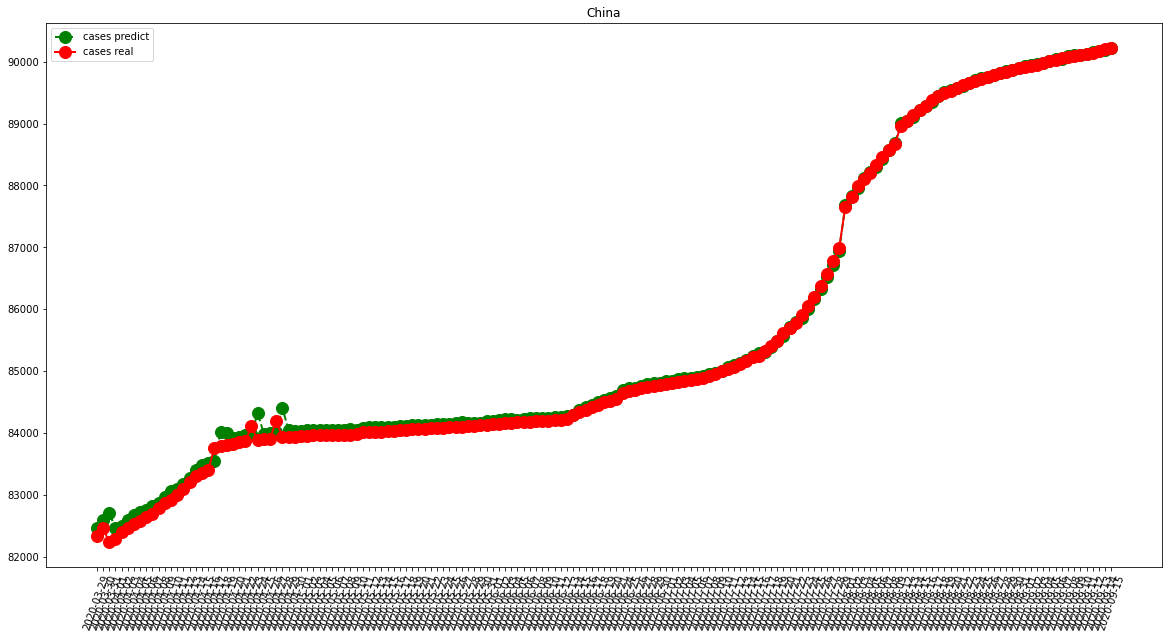

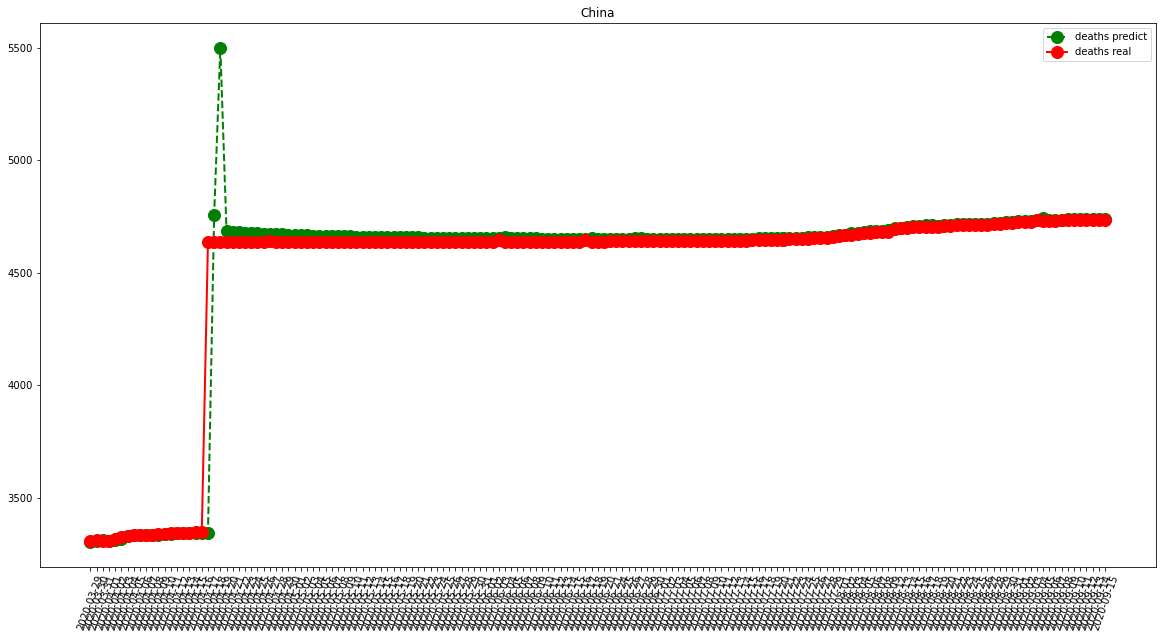

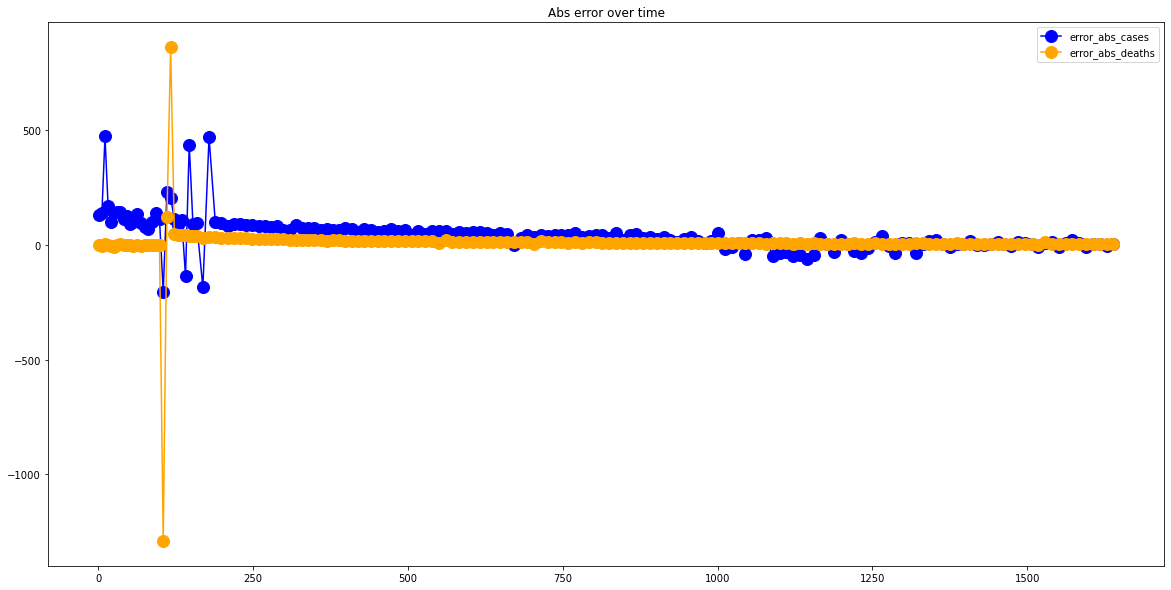

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1013.9492753623189
RMSE =  3567.9894970031282
-- United Kingdom performances for deaths --
MAE =  222.3768115942029
RMSE =  726.5501269399942


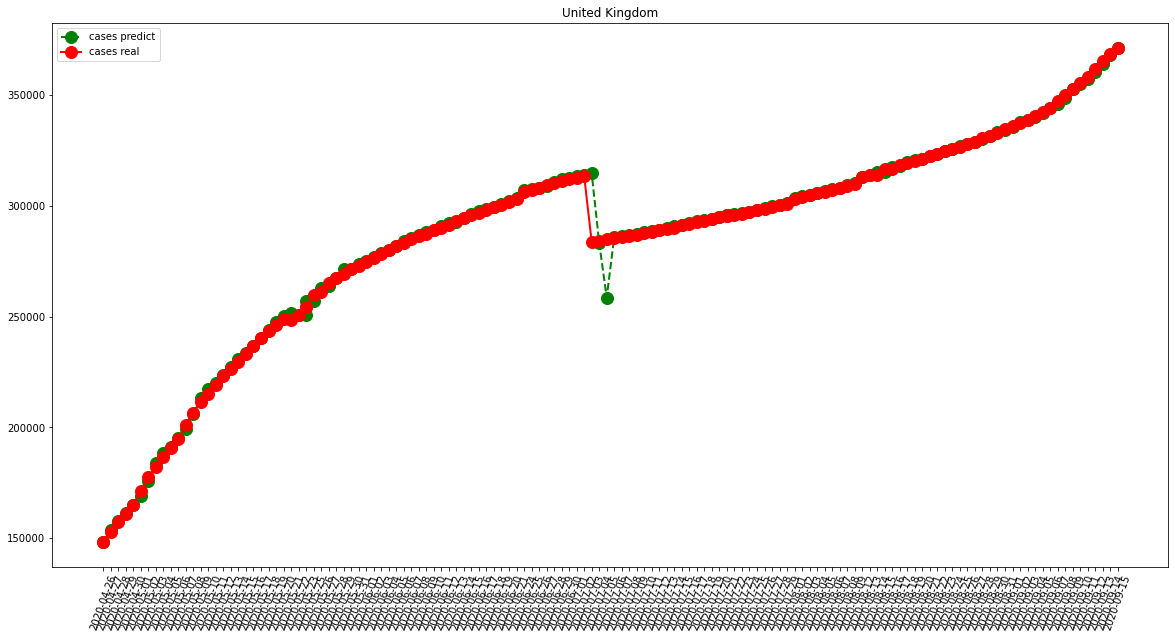

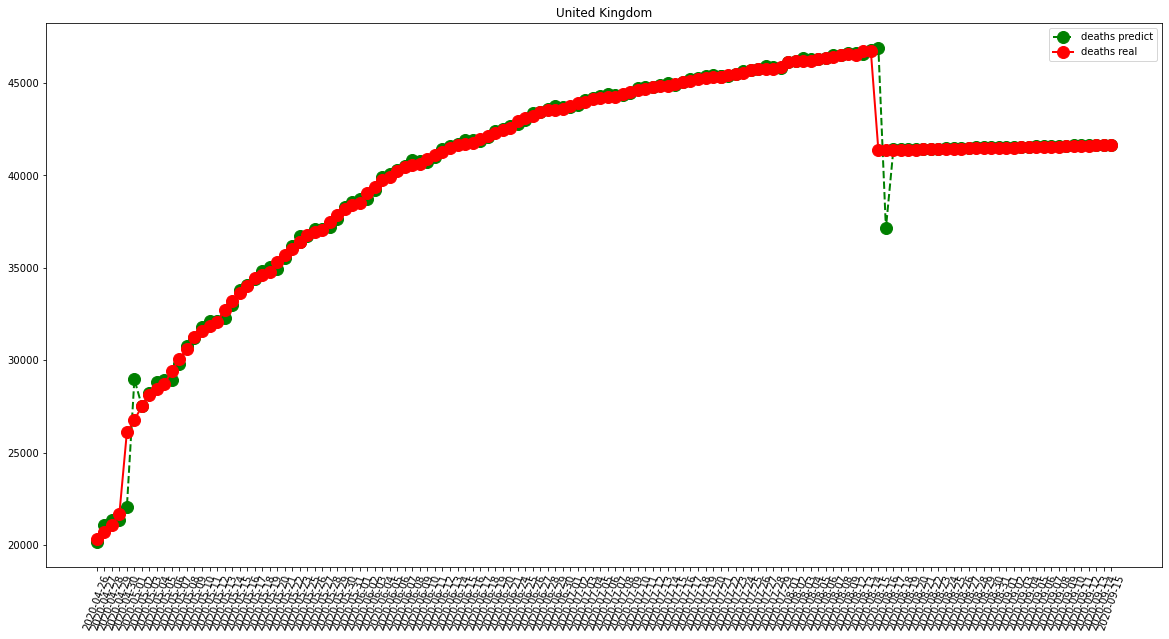

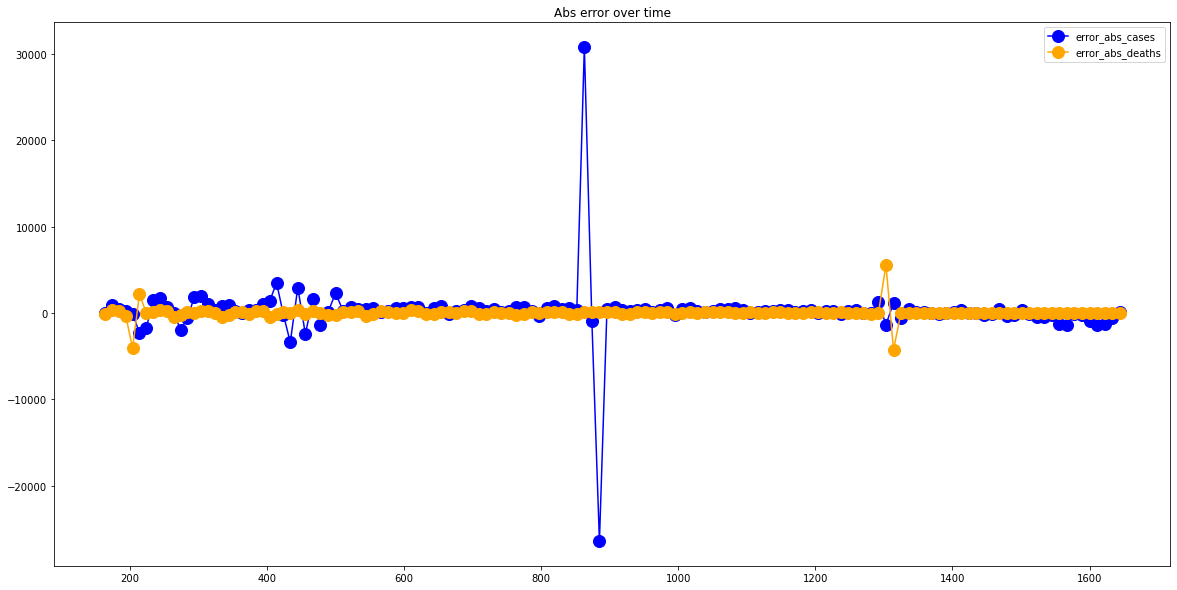

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  405.9492753623188
RMSE =  578.3719216128536
-- Germany performances for deaths --
MAE =  19.536231884057973
RMSE =  37.48680927426629


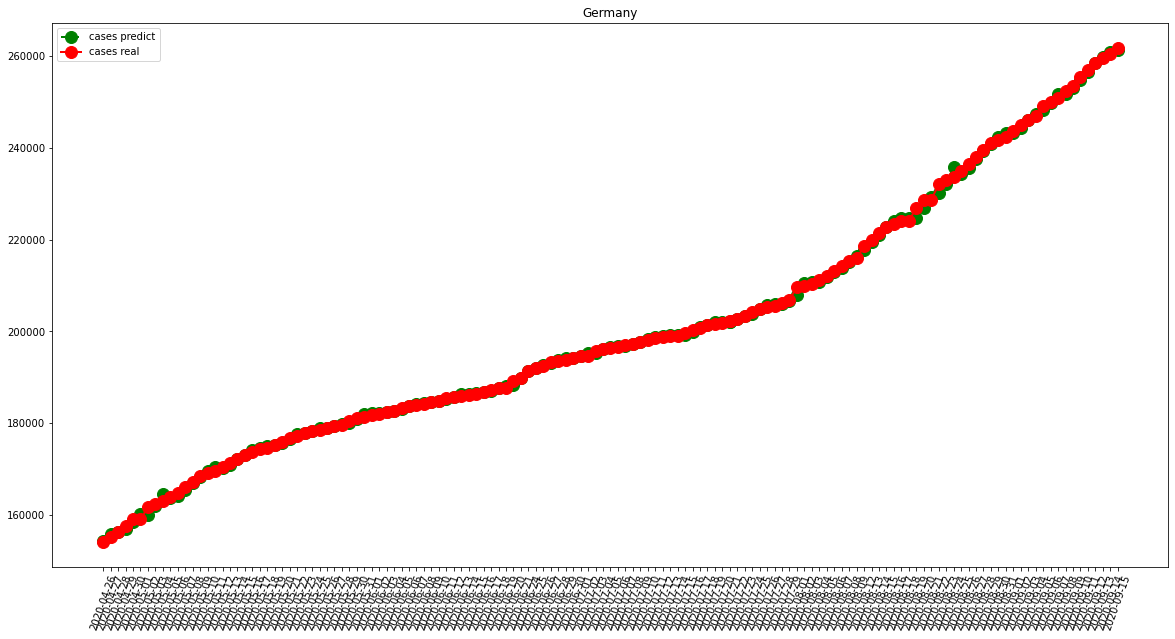

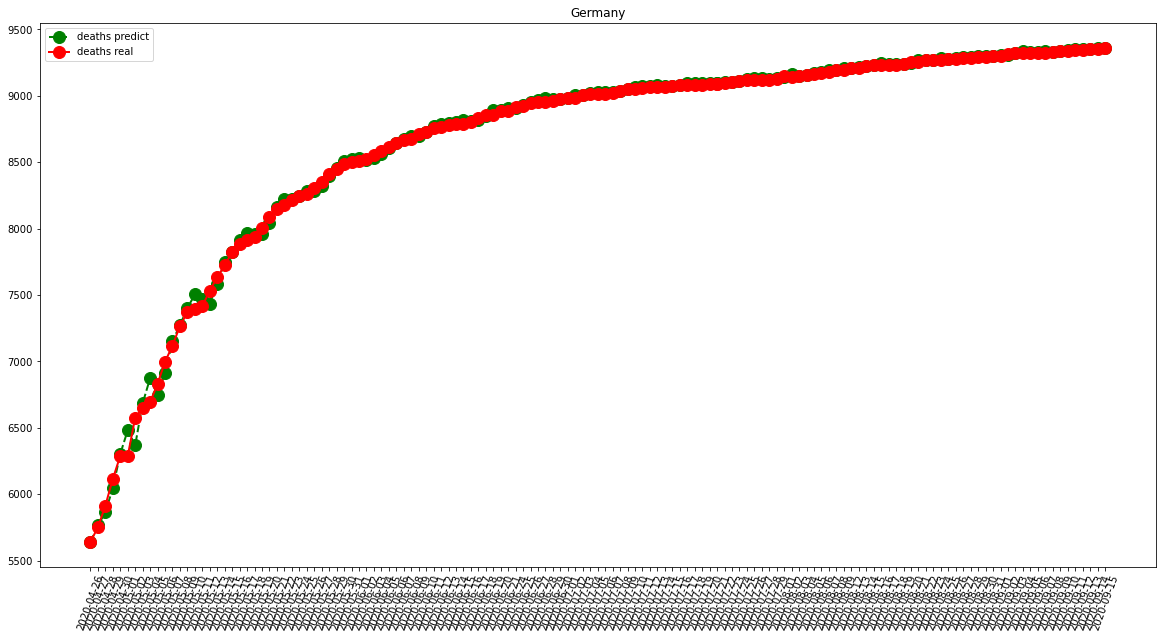

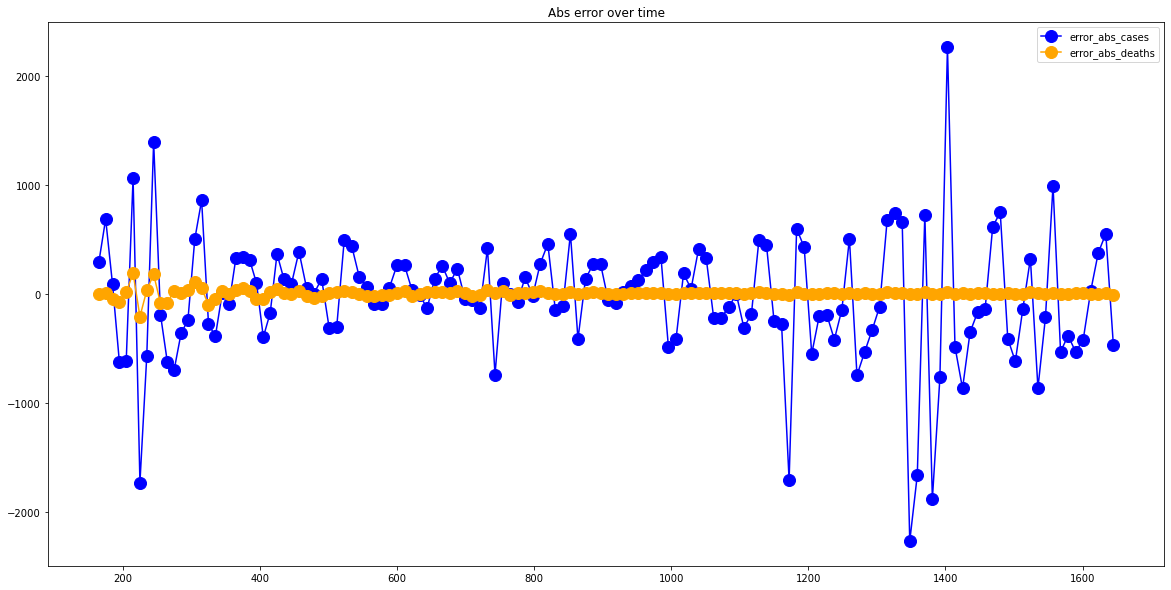

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  895.0942028985507
RMSE =  1252.5811755927339
-- Iran performances for deaths --
MAE =  51.927536231884055
RMSE =  86.49637673570956


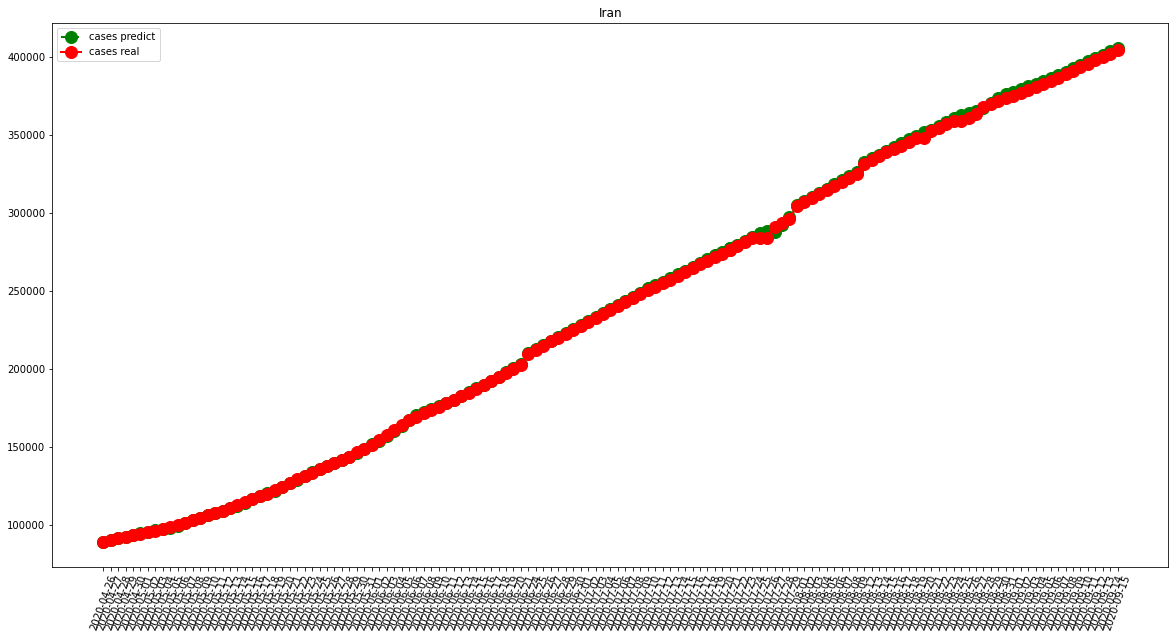

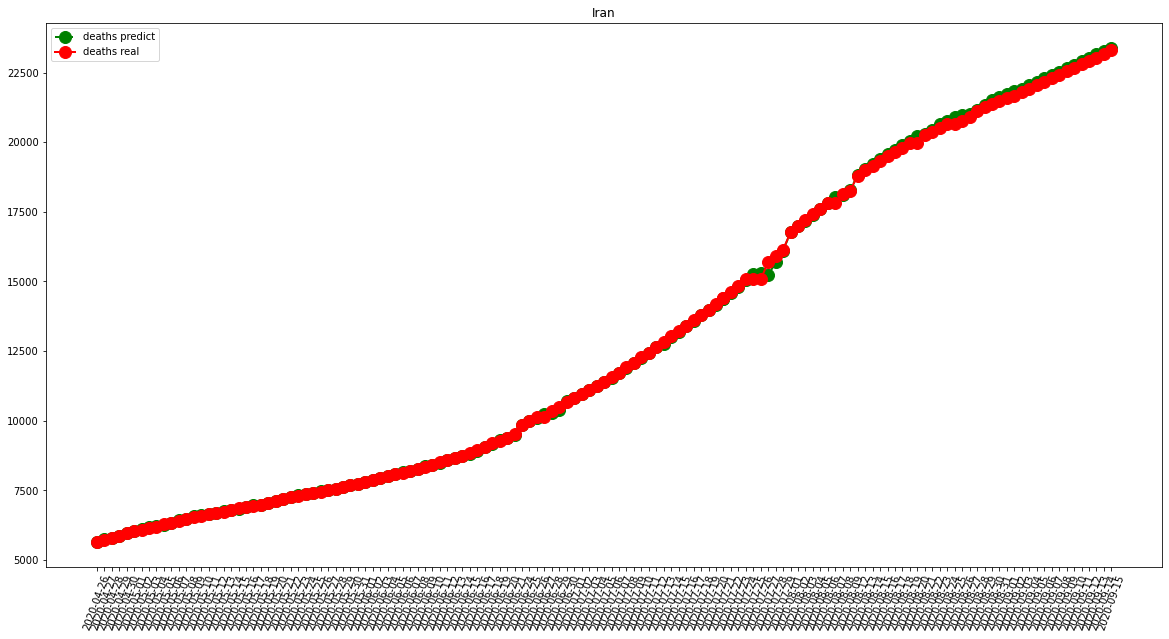

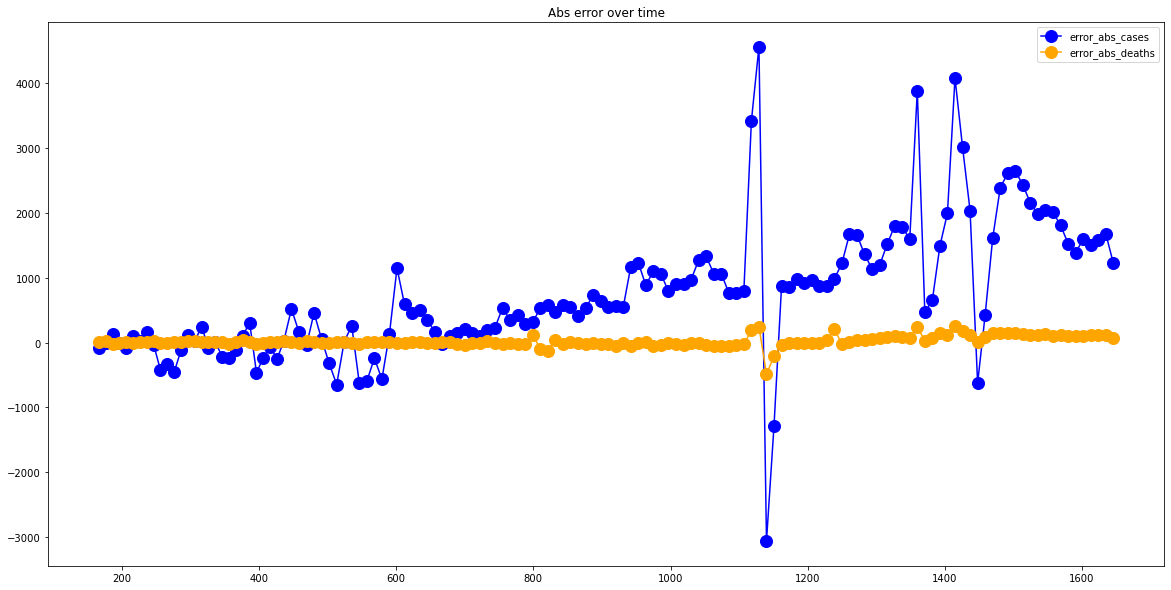

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  214.32608695652175
RMSE =  327.16067718424256
-- Turkey performances for deaths --
MAE =  15.96376811594203
RMSE =  86.57663941707152


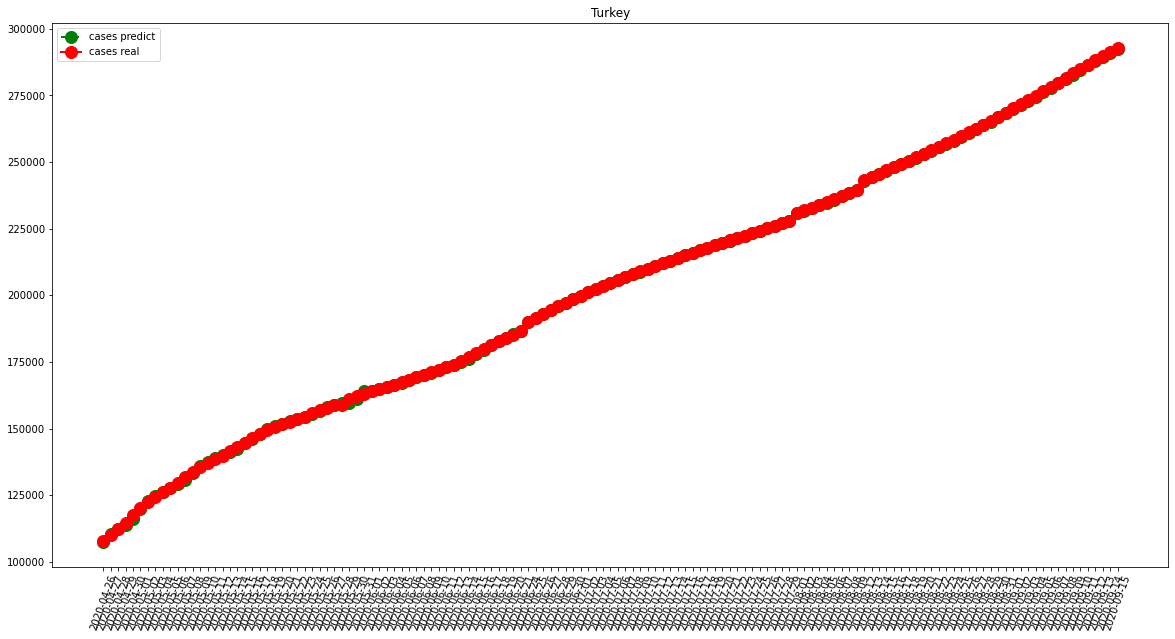

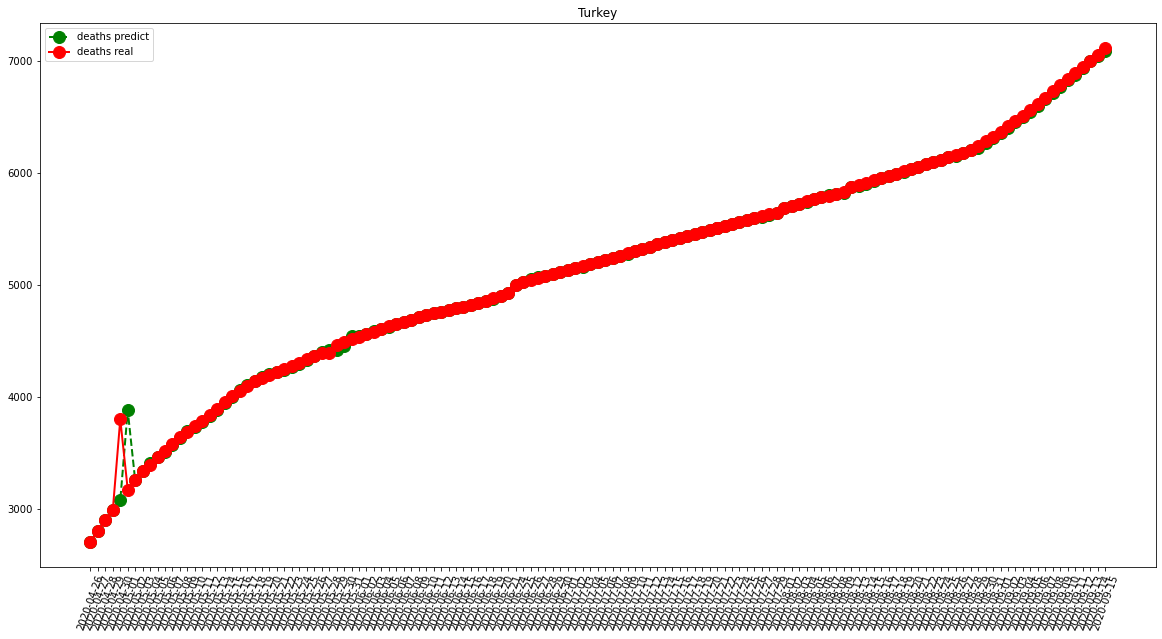

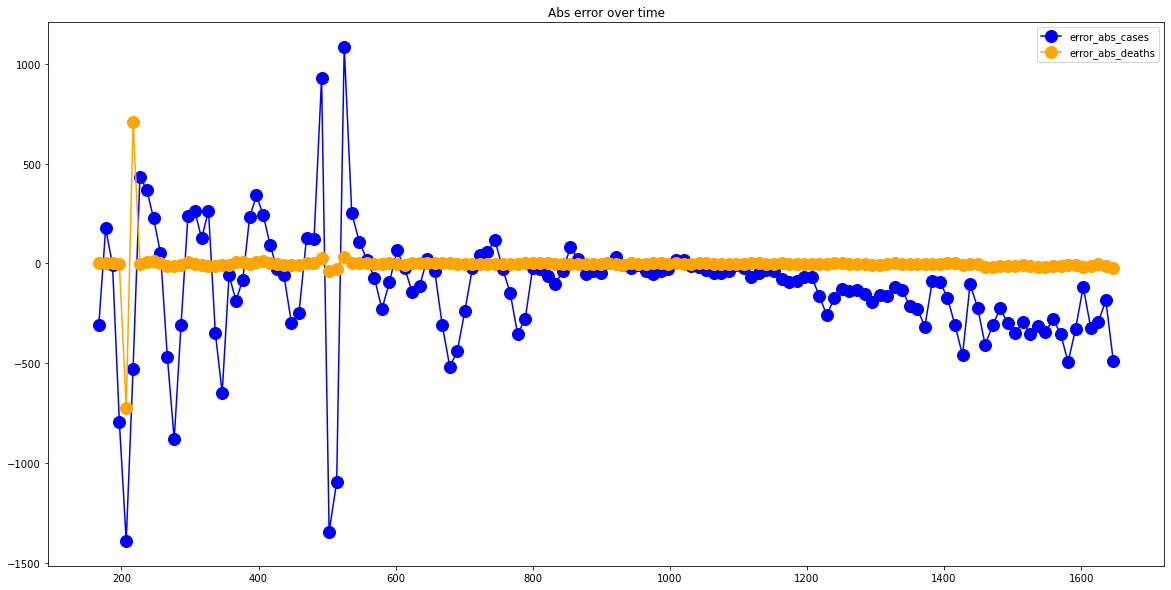

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  15965.693693693695
RMSE =  21294.35273062359
-- Brazil performances for deaths --
MAE =  479.4684684684685
RMSE =  586.680576718796


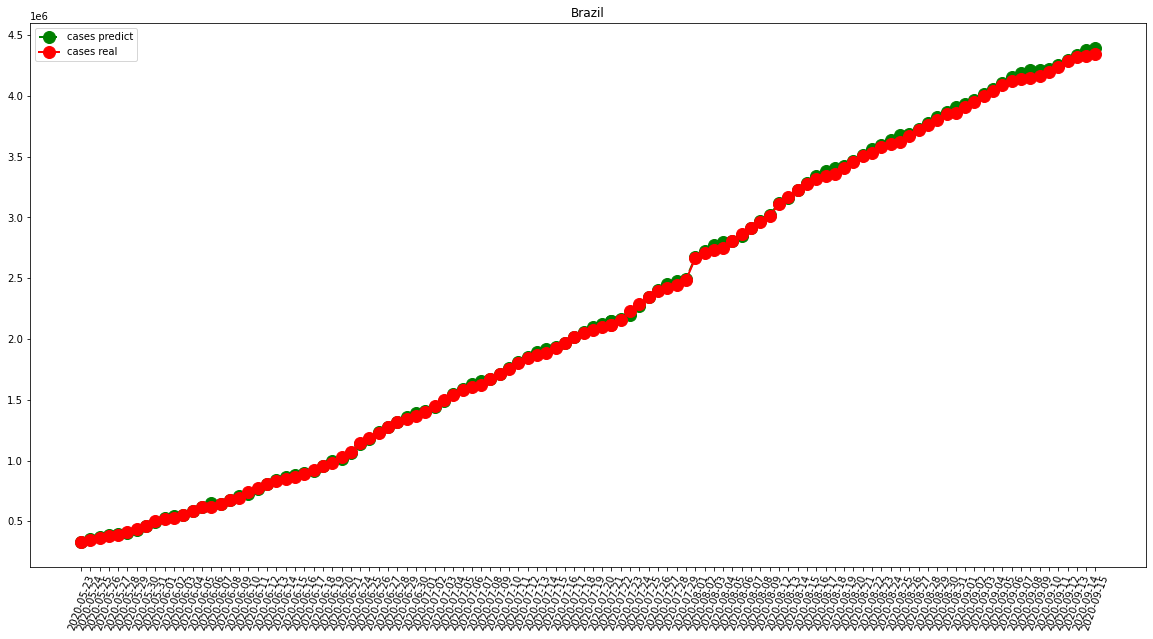

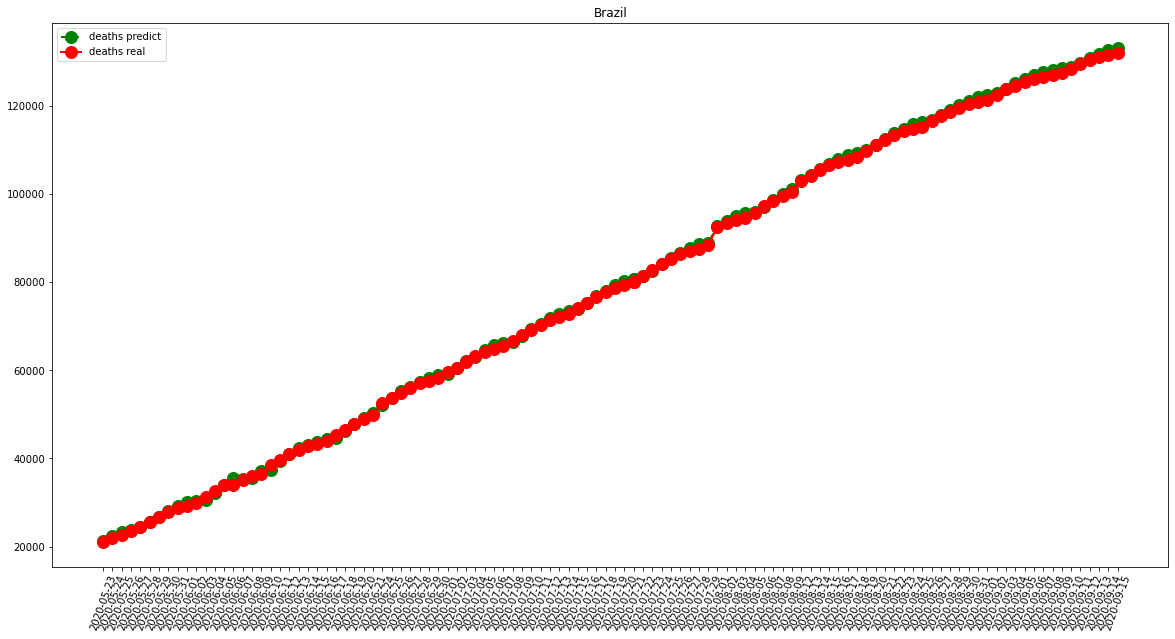

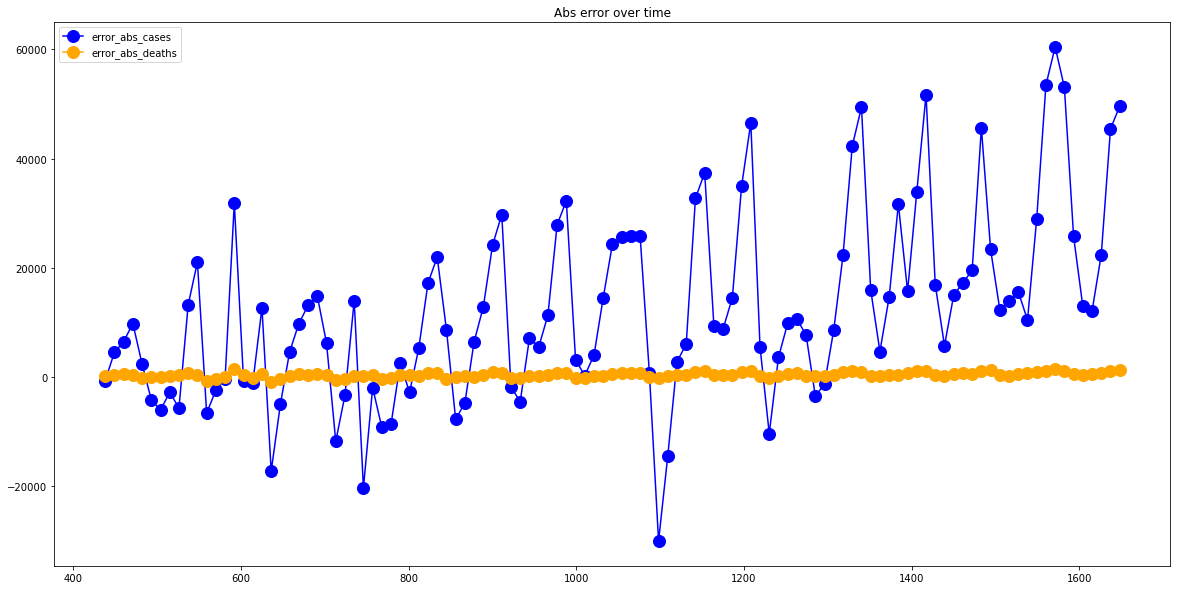

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)